In [3]:
## importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
## reading the datasets
titanic_train=pd.read_csv("Titanic_train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test=pd.read_csv("Titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:

titanic_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
## All the variables are in the prefered datatype..No need to modify.

In [11]:
titanic_train.duplicated().sum()

0

In [12]:
## Checking for null values in the dataset
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [14]:
## In total 891 entries 687 data is missing in Cabin column...Rather than replacing Iam dropping the column.

In [15]:
## Droping the Name,PassengerId,Ticket columns--> It doesnot give any information in prediction..no correlation with the target column

In [16]:
columns=['Name','Ticket','PassengerId','Cabin']
titanic_train.drop(columns=columns,inplace=True)
titanic_test.drop(columns=columns,inplace=True)

In [17]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [19]:
## Replacing Age and Embarked null values with its _Age_mean and Embarked_median
titanic_train.fillna({'Age':round(titanic_train['Age'].mean()),'Embarked':titanic_train['Embarked'].mode().iloc[0]},inplace=True)
titanic_test.fillna({'Age':round(titanic_test['Age'].mean()),'Fare':round(titanic_test['Fare'].mean())},inplace=True)

In [20]:
## Validating the replacement of null values
titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


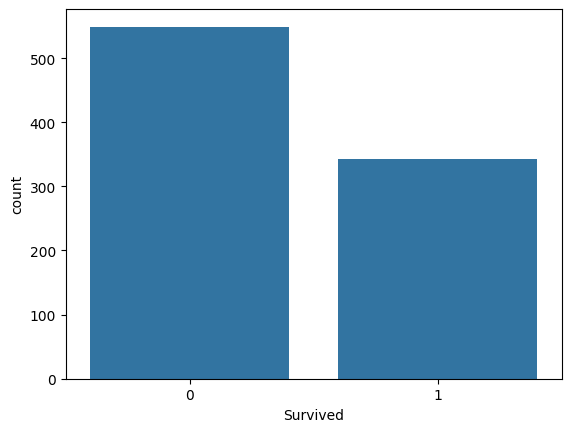

In [21]:
sns.countplot(x=titanic_train['Survived'],data=titanic_train);

In [22]:
titanic_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


#### Number of passengers not survived is greater than survived passengers.

<Axes: xlabel='Embarked', ylabel='count'>

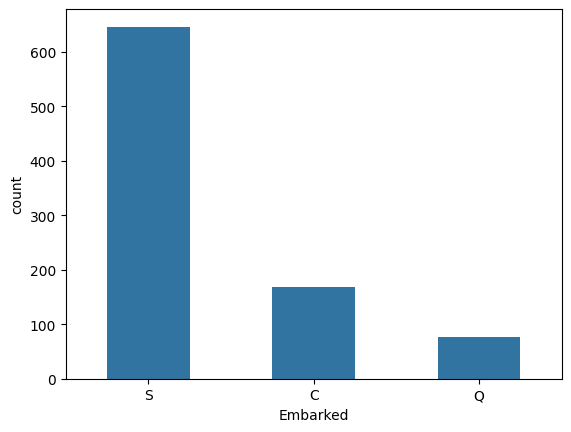

In [23]:
sns.countplot(x=titanic_train['Embarked'],data=titanic_train,width=0.5)

### Embarked S has greater value and C has second greater value and Q has less passengers

<Axes: xlabel='Sex', ylabel='count'>

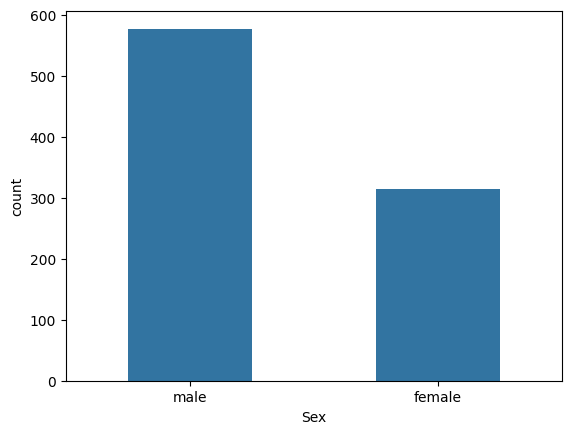

In [24]:
sns.countplot(x=titanic_train['Sex'],data=titanic_train,width=0.5)

In [25]:
## Titaninc contains more male than female.

<Axes: xlabel='Pclass', ylabel='count'>

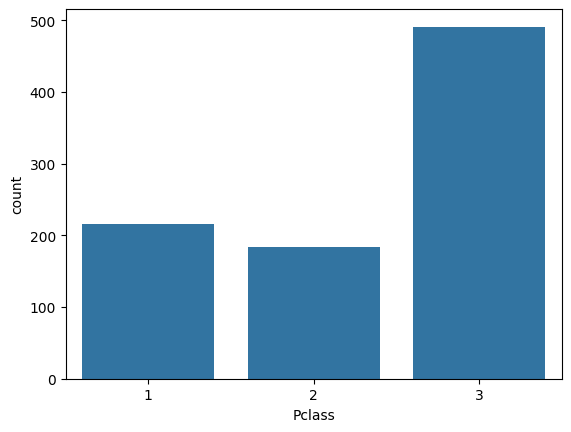

In [26]:
 sns.countplot(x=titanic_train['Pclass'],data=titanic_train)

In [27]:
## Pclass 3 contains maximum passengers > Pclass 2 contains second maximum passengers > Pclass 1 conatins less passengers.

<Axes: xlabel='Age', ylabel='Density'>

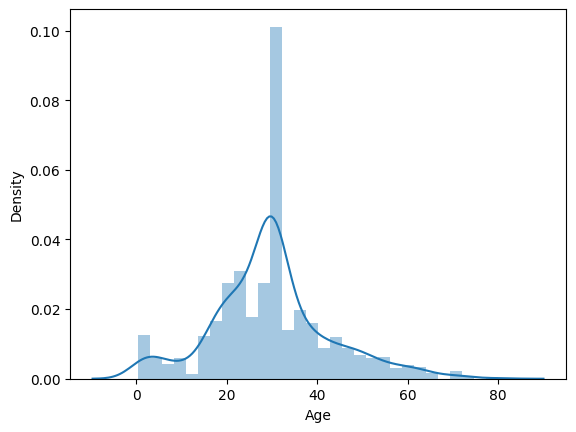

In [28]:
sns.distplot(titanic_train['Age'])

In [29]:
#### Age data distributed nin bel curve shape..therefore it is normally distributed

<Axes: xlabel='Fare', ylabel='Density'>

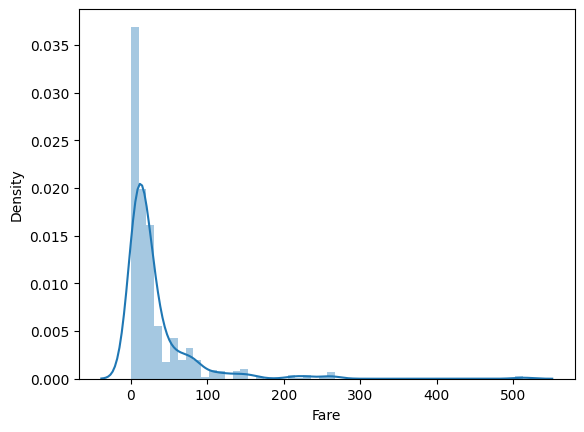

In [30]:
sns.distplot(titanic_train['Fare'])

In [31]:
#### Fare is not destributed Normally.

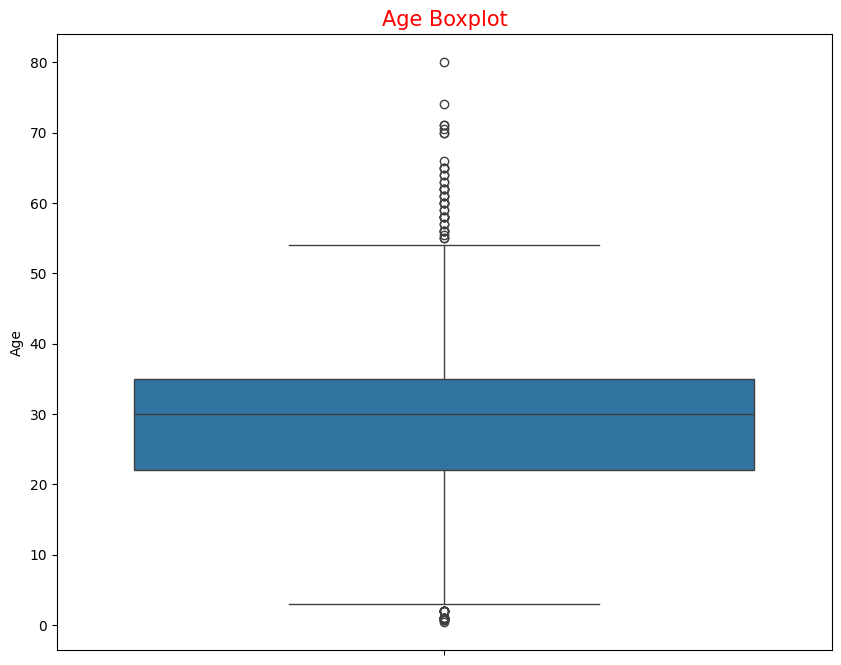

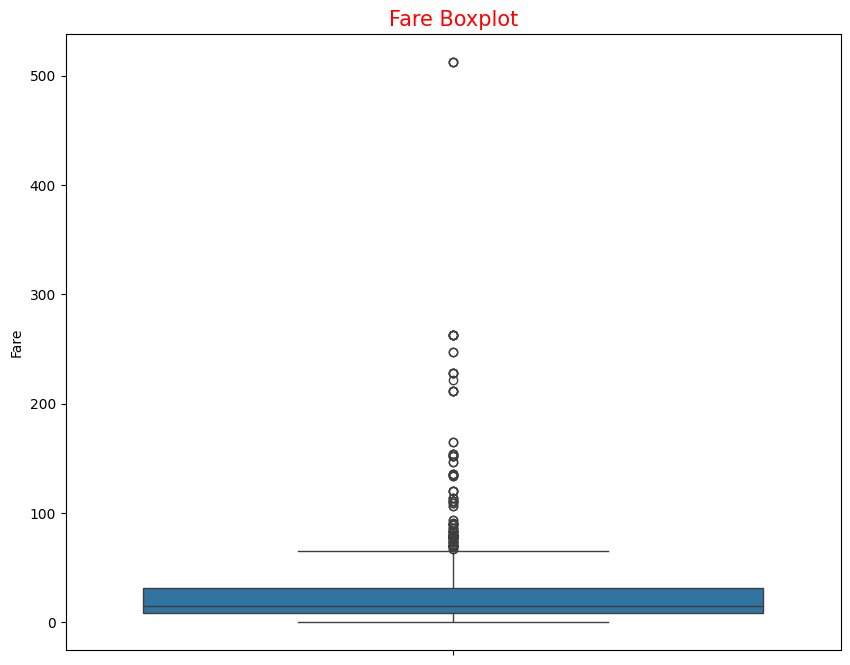

In [32]:
num_cols=['Age','Fare']
for col in num_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(titanic_train[col])
    plt.title(f"{col} Boxplot",size=15,color='red')
    plt.show()

In [33]:
## outliers removing

In [34]:

for col in num_cols:
    q1=titanic_train[col].quantile(0.25)
    q3=titanic_train[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    titanic_train=titanic_train[(titanic_train[col]>=lower_bound) & (titanic_train[col]<=upper_bound)]

In [35]:
titanic_train.shape

(718, 8)

<Axes: xlabel='Pclass', ylabel='Fare'>

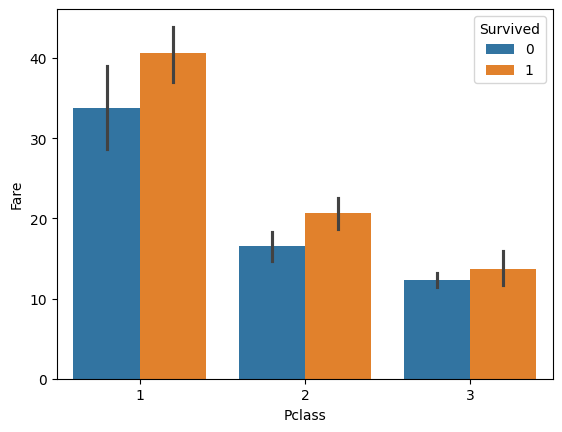

In [36]:
sns.barplot(data=titanic_train,x='Pclass',y='Fare',hue='Survived')

In [37]:
#### Graph shows the survival passangers based on Pclass and Fair

In [38]:
num_cols=[col for col in titanic_train.columns if titanic_train[col].dtype!='O']

In [39]:
corr=titanic_train[num_cols].corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.268318,-0.068203,0.002503,0.070732,0.247519
Pclass,-0.268318,1.000000,-0.294049,0.081530,0.072351,-0.594245
Age,-0.068203,-0.294049,1.000000,-0.295527,-0.141021,0.089058
SibSp,0.002503,0.081530,-0.295527,1.000000,0.392197,0.376443
Parch,0.070732,0.072351,-0.141021,0.392197,1.000000,0.320864
Fare,0.247519,-0.594245,0.089058,0.376443,0.320864,1.000000


<Axes: >

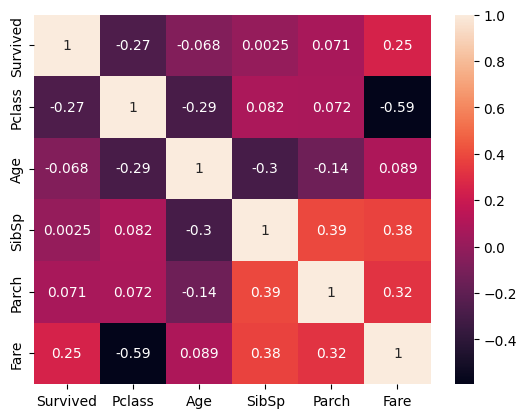

In [40]:
sns.heatmap(corr,annot=True)

#### There is no correlation between features and no strong correlation with target
#### Pclass and Fare has highly -vly correlated & SibSp and Parch has highly +vly correlated amoung features.
#### Pclass has highest  positive correalation and SibSp has highest -ve correlation with the Target Survived.

In [41]:
# sns.pairplot(titanic_train)

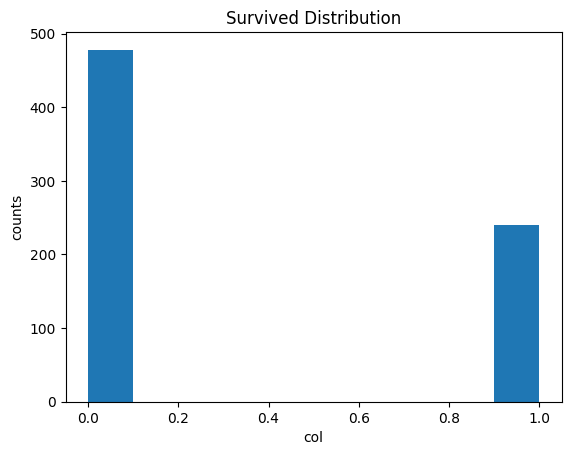

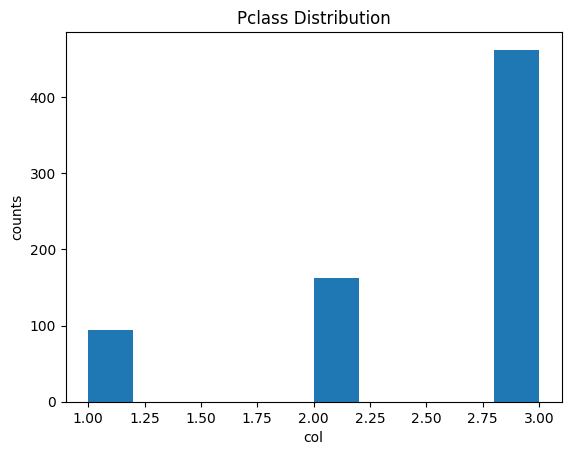

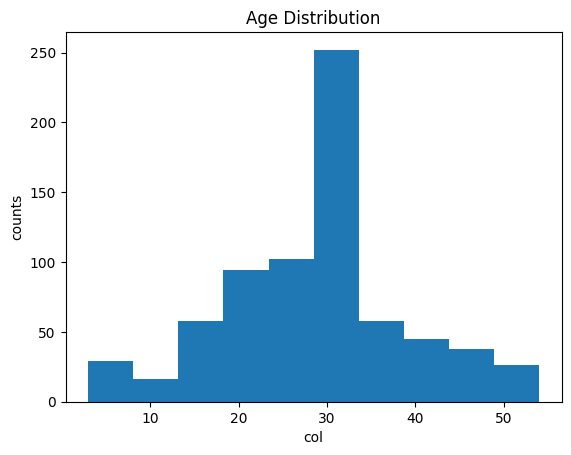

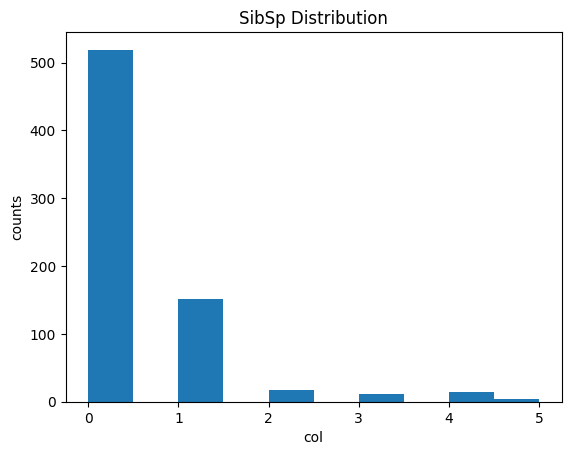

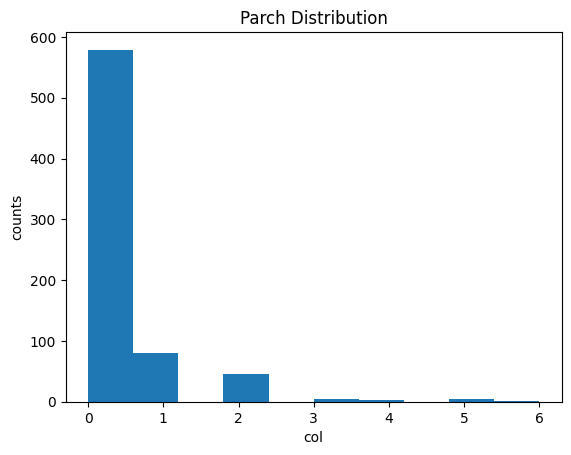

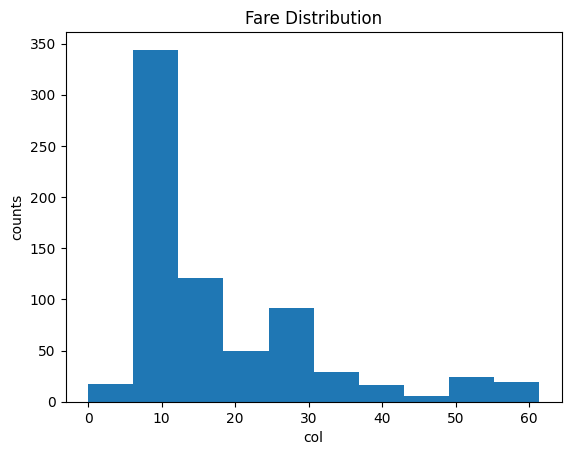

In [42]:
for col in num_cols:
    plt.hist(titanic_train[col])
    plt.title(f"{col} Distribution")
    plt.xlabel('col')
    plt.ylabel('counts')
    plt.show()


In [43]:
## Histogram shows the distribution in every data column.It showes the distribution is shewed or normally distributed.

In [44]:
## Splitting columns as Target and Features

In [45]:
features=titanic_train.drop('Survived',axis=1)
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,30.0,0,0,8.4583,Q


In [46]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [47]:
target=titanic_train['Survived']
target.head()

,Survived
0,0
2,1
3,1
4,0
5,0


In [48]:
features.shape

(718, 7)

In [49]:
## Here,in features categorical columns
## Sex and Embarked both are Nominal data...therefore apply one-hot encoder or get_dummies.

In [50]:
features=pd.get_dummies(features,dtype=int)
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,30.0,0,0,8.4583,0,1,0,1,0


In [51]:
titanic_test=pd.get_dummies(titanic_test,dtype=int)
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


#### splitting the dataset into training and testing
#### even though you have given test and train set superately testing set does not contain the target column...
#### so for testing validation Iam splitting the traing dataframe as training and testing.

In [52]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=100,train_size=0.80)

In [53]:
x_train.shape

(574, 10)

In [54]:
x_test.shape

(144, 10)

#### Model Building

In [55]:
log_regression=LogisticRegression()

In [56]:
log_regression.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred1=log_regression.predict(x_train)

#### Evaluating the Model

#### Accuracy Score

In [58]:
y_pred2=log_regression.predict(x_test)

In [59]:
## Training Validation
accuracy_score(y_train,y_pred1)

0.7979094076655052

#### Prediction For testing sample

In [60]:
accuracy_score(y_test,y_pred2)

0.7986111111111112

In [61]:
titanic_pred=log_regression.predict(titanic_test)

In [62]:
## Joining the predicted value to the dataset.
titanic_test['Survived']=pd.DataFrame(titanic_pred)

In [63]:
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,1,0,1,0,0,1
415,3,38.5,0,0,7.2500,0,1,0,0,1,0
416,3,30.0,0,0,8.0500,0,1,0,0,1,0


#### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
conf=confusion_matrix(y_test,y_pred2)
conf

array([[82, 13],
       [16, 33]])

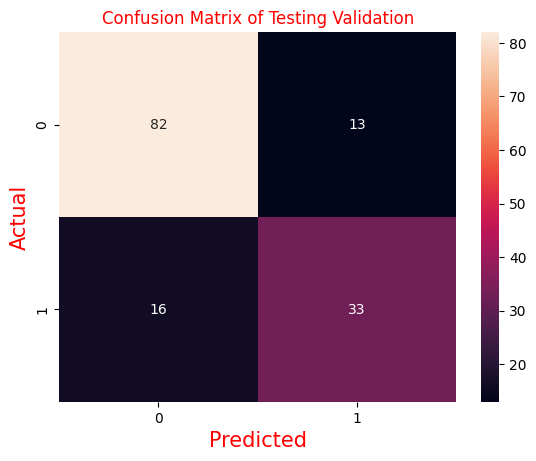

In [66]:
sns.heatmap(conf,annot=True)
plt.title("Confusion Matrix of Testing Validation",color='red')
plt.xlabel("Predicted",color='red',size=15)
plt.ylabel('Actual',color='red',size=15)
plt.show()

#### Precision: The model has predicted 81+15=96 as 0 (Not Survived) out of that  81 is correct (actual and predicted both as Not survived and 14 as survive(actually not survived)
#### The model has predicted 14+34=48 as 1 (Survived) out of that  34 is correct (actual and predicted both as survived).
#### Recall: In the testing data, Total 81+14=95 0s are there(95 Not survived), out of that model has predicted 81 as not survived and 14 as survived.
#### In testing data,Total 15+34 =49 1s are there(49 Survived),out of that model has able to predict 34 as survived and 15 as not survived.

In [67]:
print("classification report of testing validation")
print("-------------------------------------------")
print(classification_report(y_test,y_pred2))

classification report of testing validation
-------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        95
           1       0.72      0.67      0.69        49

    accuracy                           0.80       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.80      0.80      0.80       144



#### Precision:Out of total survived predicted by the model how much it predicts correct.....TP/TP+FP
#### Recall : Out of actual survived value, how much values are identified by the model......TP/TP+FN

#### ROC Curve

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score

In [69]:
log_probab=log_regression.predict_proba(x_test)[:,1]

In [70]:
auc_score=roc_auc_score(y_test,log_probab)

In [71]:
fpr,tpr,thr=roc_curve(y_test,log_probab)

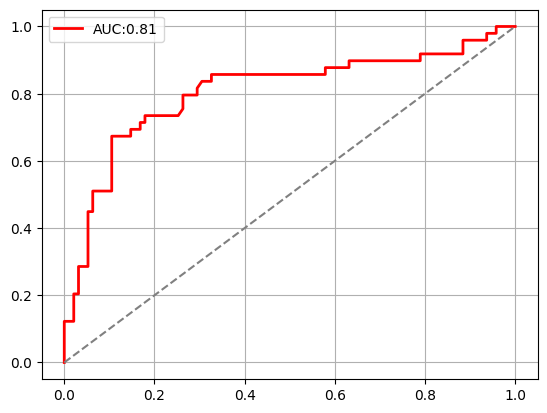

In [72]:
plt.plot(fpr,tpr,lw=2,color='red',label=f'AUC:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.grid()
plt.show()

In [73]:
log_regression.intercept_

array([1.73237706])

In [74]:
log_regression.coef_

array([[-0.74608325, -0.05086576, -0.60480702, -0.13183951,  0.0283824 ,
         1.9257024 , -0.6886997 ,  0.34094948,  0.62970747,  0.26634574]])

In [75]:
#### Total 10 columns are there in the features..For each column  corresponding coefficient is generated by the model.

In [76]:
## Deployement

In [77]:
import pickle

In [78]:
file = 'logregression_pkl'  # Ensure this is set before calling pickle.dump
pickle.dump(log_regression, open(file, 'wb'))


In [79]:
%%writefile Model_Dep_app.py

import streamlit as st
import pickle
import pandas as pd

model=pickle.load(open('logregression_pkl','rb'))

def user_input_varibles():
  pclass=st.sidebar.number_input('Enter pclass:')
  age=st.sidebar.number_input('Enter age:')
  sibsp=st.sidebar.selectbox("Choose SibSp", [0,1])
  parch=st.sidebar.number_input('Enter parch:')
  fare=st.sidebar.number_input("enter fare:")
  sex=st.sidebar.selectbox("choose gender:",['female','male'])
  sex_female=1 if sex=="female" else 0
  sex_male=1 if sex=='male' else 0
  embarked=st.sidebar.selectbox("choose embarked",['C','Q','S'])
  embarked_C=1 if embarked=='C' else 0
  embarked_Q=1 if embarked=='Q' else 0
  embarked_S=1 if embarked=='S' else 0
  embarked=pd.get_dummies(embarked,dtype='int')
  data={'Pclass':pclass,'Age':age,'SibSp':sibsp,'Parch':parch,'Fare':fare,'Sex_female':sex_female,'Sex_male':sex_male,
  'Embarked_C':embarked_C,'Embarked_Q':embarked_Q,'Embarked_S':embarked_S}
  features=pd.DataFrame(data,index=[1])
  return features

df= user_input_varibles()
st.subheader('user_input_varibales')
st.write(df)

pred_prob=model.predict_proba(df)
pred=model.predict(df)

st.subheader("predicted")
st.write("Survived" if pred_prob[0][1]>0.5 else "Not Survived")
st.subheader("predicted Probability")
st.write(pred_prob)

Overwriting Model_Dep_app.py


In [80]:
!wget -q -O - ipv4.icanhazip.com

34.75.157.73


In [81]:
!pip install -q streamlit
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
changed 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [ ]:
!streamlit run Model_Dep_app.py  & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.157.73:8501

⠴⠦⠧your url is: https://floppy-parrots-enjoy.loca.lt


cross validation :
it helps to assess how well a model generalizes to unseen data.
it helps to mesure the accuracy of the prediction and it will provide the metrics to improve the performance of the model.
The dataset is divided into k subsets (called folds).
For each iteration:
One fold is used as the validation (test) set.
The remaining k−1 folds are used as the training set.
cross validation techniques are : accuracy score,F1 score,classification report,recall,precision etc.
Importance in binary classification: measures the performance, reduce overfit problem,hanfle imbalance dataset. **bold text**